### Домашнє завдання: Пониження розмірностей для Аналізу Портретів Клієнтів

#### Контекст
В цьому ДЗ ми попрацюємо з методами пониження розмірності на наборі даних для задачі аналізу портретів клієнтів (Customer Personality Analysis). **В попередньому ДЗ ми працювали з цими даними використовуючи кластеризацію, зараз використаємо кластеризацію і візуалізауємо результати з різними методами.**

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


Для початку, запустіть код нижче. Всі ці кроки ми робили в попередньому ДЗ і для того, щоб результати кластеризації у нас були схожими, потрібно аби передобробка була однаковою.

In [2]:
import pandas as pd

# 1. Завантаження даних
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# 2. Обробка пропущених значень
df['Income_not_filled'] = df.Income.isna()
df.Income = df.Income.fillna(-1)

# 3. Обробка дати реєстрації
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')
today = df.Dt_Customer.max()
df['days_lifetime'] = (today - df.Dt_Customer).dt.days
df['years_customer'] = df.Year_Birth.apply(lambda x: today.year - x)

# 4. Категоризація рівня освіти
df_education = pd.get_dummies(df.Education, prefix='education').astype(int)
df = pd.concat([df, df_education], axis=1)

# 5. Очищення сімейного стану
marital_status_map = {'Alone': 'Single', 'Absurd': 'Else', 'YOLO': 'Else'}
df['Marital_Status_clean'] = df.Marital_Status.map(marital_status_map)
df_ms = pd.get_dummies(df.Marital_Status_clean, prefix='marital').astype(int)
df = pd.concat([df, df_ms], axis=1)

# 6. Форматування доходу і видалення викиду
df.Income = df.Income.astype(int)
df = df[df.Income != 666666]

# 7. Створення фінального набору даних
X = df.drop(['ID', 'Dt_Customer', 'Education', 'Marital_Status', 'Marital_Status_clean'], axis=1)
X.reset_index(drop=True, inplace=True)

### Завдання 1: Виконання кластеризації та пониження розмірності для візуалізації результатів

Ваше завдання — провести кластеризацію клієнтів та візуалізувати результати кластеризації, використовуючи метод головних компонент (PCA) для пониження розмірності даних.

#### Інструкції:

1. **Вибір ключових характеристик:**
   Давайте обмежимось тільки наступними хараткеристиками для кластеризації цього разу:
   - `Income`: Річний дохід домогосподарства клієнта
   - `Recency`: Кількість днів з моменту останньої покупки клієнта
   - `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
   - `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
   - `days_lifetime`: Кількість днів з моменту реєстрації клієнта у компанії
   - `years_customer`: Вік клієнта
   - `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць
   Відберіть в наборі даних `X` лише ці характеристики.

2. **Стандартизація даних:**
   Використайте метод `StandardScaler` для стандартизації значень обраних характеристик.
   
   **Чому не MinMaxScaler:**
   - Для PCA краще використовувати StandardScaler, бо він вирівнює дисперсію ознак, на відміну від MinMaxScaler, що просто масштабує значення без врахування варіації.

   - Для K-Means також краще використовувати StandardScaler, бо алгоритм чутливий до масштабів: фічі з більшими значеннями сильніше впливають на обчислення відстаней, що може спотворити кластери.

3. **Кластеризація:**
   Проведіть кластеризацію клієнтів, використовуючи метод `KMeans` з трьома кластерами.

4. **Пониження розмірності:**
   Використайте метод головних компонент (PCA) для пониження розмірності даних до трьох компонент.

5. **Візуалізація результатів:**
   Використовуючи plolty express побудуйте 3D-графік розподілу клієнтів у просторі трьох головних компонент, де кольором позначено кластери.

6. **Опишіть, що спостерігаєте:**
   Чи кластеризація чітко розділила дані?

Далі ми детальніше проінтерпретуємо результати візуалізації і пониження розмірностей.

In [3]:
from sklearn.preprocessing import StandardScaler

# 1.
selected_features = ['Income', 'Recency', 'NumStorePurchases', 'NumDealsPurchases', 'days_lifetime', 'years_customer', 'NumWebVisitsMonth']
X_selected = X[selected_features]

# 2.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Перевіряємо
X_scaled[:5]

array([[ 0.30479565,  0.30662377, -0.55113587,  0.34978184,  1.53094037,
         0.98492226,  0.69388693],
       [-0.22972381, -0.38405089, -1.16644038, -0.1678398 , -1.19020352,
         1.23528074, -0.13031086],
       [ 0.91550023, -0.79845569,  1.29477768, -0.68546143, -0.20564419,
         0.31729965, -0.54240975],
       [-1.12246287, -0.79845569, -0.55113587, -0.1678398 , -1.06156763,
        -1.26830405,  0.28178803],
       [ 0.31182045,  1.54983816,  0.06416865,  1.3850251 , -0.95272187,
        -1.01794557, -0.13031086]])

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px

# 3. Виконуємо кластеризацію методом K-середніх з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)  # Створюємо модель KMeans з 3 кластерами та фіксованим random_state для відтворюваності
clusters = kmeans.fit_predict(X_scaled)  # Навчаємо модель на стандартизованих даних та отримуємо кластери

# 4. Застосовуємо PCA для зменшення розмірності до 3 компонент
pca = PCA(n_components=3)  # Створюємо модель PCA для зменшення розмірності до 3 компонент
X_pca = pca.fit_transform(X_scaled)  # Трансформуємо стандартизовані дані в нові компоненти

# Додаємо мітки кластерів до результатів PCA
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])  # Створюємо DataFrame з результатами PCA
df_pca['Cluster'] = clusters  # Додаємо стовпець з кластерами

# 5. Візуалізуємо результати кластеризації в 3D просторі за допомогою Plotly
fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3', color='Cluster', title="3D Clustering of Customers",
                    labels={'Cluster': 'Cluster ID', 'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2', 'PCA3': 'PCA Component 3'})
# Створюємо 3D скаттерплот, де клієнти позначені за допомогою компонент PCA та кластерів
fig.show()  # Виводимо графік

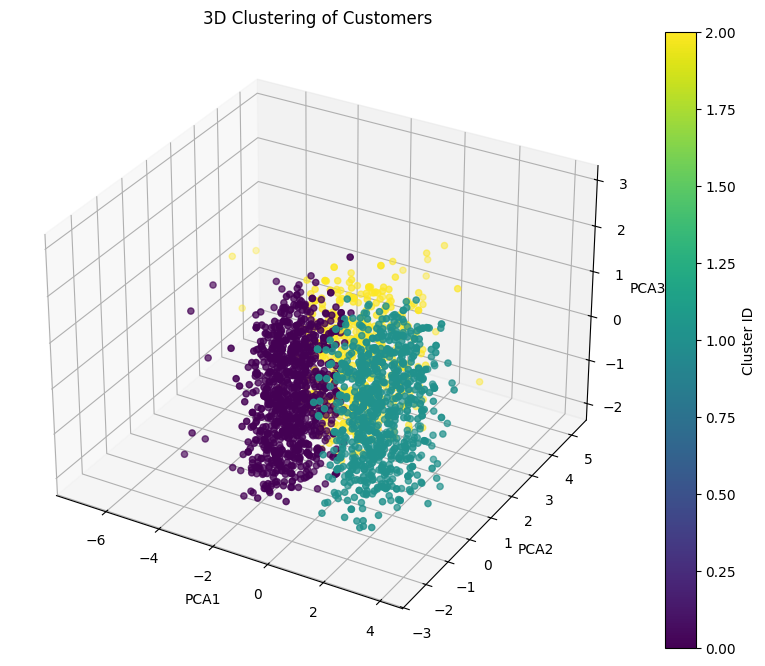

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters
scatter = ax.scatter(df_pca['PCA1'], df_pca['PCA2'], df_pca['PCA3'], c=df_pca['Cluster'], cmap='viridis')

# Adding labels and title
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D Clustering of Customers')

# Show the colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster ID')

plt.show()

Таким чином, кластеризація виглядає логічною, і навіть якщо дані не ідеально розділені, ці кластери все одно можуть бути корисними для подальшого таргетування маркетингових кампаній або налаштування продуктів. Це дозволяє ефективніше працювати з різними сегментами клієнтів.

### Завдання 2: Аналіз результатів пониження розмірності

1. **Розрахунок частки поясненої дисперсії:**
   Визначте, яка частка загальної варіації даних пояснюється кожною з трьох головних компонент (PC1, PC2, PC3) за допомогою атрибуту `explained_variance_ratio_` об'єкта PCA. Виведіть результат на екран.

2. **Розрахунок кумулятивної частки поясненої дисперсії:**
   Обчисліть кумулятивну частку поясненої дисперсії для трьох головних компонент, щоб зрозуміти, скільки варіації даних пояснюється першими кількома компонентами.

In [6]:
# 1. Розрахунок частки поясненої дисперсії для кожної компоненти
explained_variance_ratio = pca.explained_variance_ratio_

# 2. Розрахунок кумулятивної частки поясненої дисперсії
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Виведемо результат
explained_variance_ratio, cumulative_explained_variance

(array([0.31847333, 0.19659128, 0.1433869 ]),
 array([0.31847333, 0.51506461, 0.6584515 ]))

### Завдання 3: Інтерпретація "Loadings"

Продовжуємо інтерпретацію результатів `PCA`і познайомимось з новим поняттям `loadings`, яке допоможе нам знайти звʼязок між головними компонентами і оригінальними ознаками в наборі даних.

Ми зараз побудували візуалізацію кластерів точок даних в просторі трьох головних компонент. Але хочеться знайти звʼязок між головними компонентами і оригінальними ознаками. Для розуміння, які початкові характеристики даних мають найбільший вплив на ці головні компоненти, ми можемо використати атрибут `components_` методу `PCA`.

#### Що таке `pca.components_`?

`pca.components_` — це масив, який містить коефіцієнти (або "ваги"), що показують внесок кожної вихідної ознаки у кожну з головних компонент. Ці коефіцієнти ще називаються **"loading"** або "навантаженнями" компонент.

- **Loadings** (`навантаження`) відображають важливість кожної змінної (ознаки) для відповідної головної компоненти. Вони показують, яким чином змінні поєднуються, щоб утворити нові, зменшені вимірювання.
- Якщо коефіцієнт має високе абсолютне значення (як позитивне, так і негативне), це вказує на те, що відповідна змінна сильно впливає на головну компоненту.

#### Саме завдання
Ваше завдання — обчислити "навантаження" для кожної з головних компонент і інтерпретувати результати.

1. **Обчислення loadings для компонент:**
   Використайте атрибут `components_` об'єкта PCA для створення DataFrame, який відображатиме внесок кожної вихідної ознаки в кожну головну компоненту.

2. **Інтерпретація результатів:**
   Виведіть значення "навантажень" і проаналізуйте, які ознаки найбільше впливають на кожну головну компоненту.

Здається, виникла помилка через невідповідність кількості компонент і ознак. Оскільки ми використовуємо лише 7 обраних характеристик для PCA, але намагаємося створити DataFrame з розмірами, що відповідають кількості ознак і компонент, необхідно виправити індекси та стовпці для коректного відображення.

In [8]:
# 1. Обчислюємо "навантаження" (loadings) для кожної головної компоненти
loadings = pd.DataFrame(pca.components_, columns=X_selected.columns, index=[f'PC{i+1}' for i in range(3)])

# Виведемо значення "навантажень"
loadings

,Income,Recency,NumStorePurchases,NumDealsPurchases,days_lifetime,years_customer,NumWebVisitsMonth
PC1,0.584238,0.010075,0.488621,-0.198661,-0.132683,0.189393,-0.571728
PC2,0.165255,0.036810,0.384659,0.608119,0.602585,0.208946,0.216329
PC3,-0.044491,0.975799,-0.080566,-0.034808,-0.022223,0.193368,-0.015815


PC1: Ця компонента має високі значення для "Income" і "NumStorePurchases", "NumWebVisitsMonth", що свідчить про важливість цих змінних для PC1.

PC2: Найбільший вплив на цю компоненту мають "NumDealsPurchases" і "days_lifetime". Це свідчить, що поведінка клієнтів щодо покупок зі знижками та час, який вони провели як клієнти, важливі для цієї компоненти.

PC3: Ця компонента найбільше пов'язана з "Recency" (високий позитивний коефіцієнт), що означає, що час, що пройшов від останньої покупки, має важливий вплив на PC3.

Інтерпретація:

PC1, ймовірно, фокусується на поведінці покупок в магазинах і онлайн, а також на доходах.

PC2 орієнтується на частоту покупок за знижками та довготривалість клієнтських відносин.

PC3 сильно залежить від того, коли клієнти здійснювали покупку.

###Завдання 4
Давайте проаналізуємо "навантаження" (**loadings**) для трьох головних компонент після вилучення ознаки `Income`. Це допоможе нам зрозуміти, як змінилася важливість інших ознак для кожної головної компоненти, коли одна з ключових характеристик (`Income`) була вилучена.

#### Кроки для проведення аналізу і ваше завдання:

1. Видаліть ознаку `Income` з нашого набору даних `X` і повторно виконайте PCA (метод головних компонент) для отримання нових "навантажень".

2. Обчисліть нові "навантаження" для трьох головних компонент на наборі даних без `Income`

3. Проаналізуйте, які ознаки мають найбільший вплив на кожну головну компоненту після вилучення `Income`.

4. Перегляньте, наскільки кожна з головних компонент пояснює дисперсію в даних без ознаки `Income`.

In [9]:
# 1. Видаляємо ознаку Income з набору даних
X_without_income = X.drop(columns=['Income'])

# 2. Стандартизуємо новий набір даних без Income
X_scaled_without_income = StandardScaler().fit_transform(X_without_income)

# 3. Виконуємо PCA для нових даних
pca_without_income = PCA(n_components=3)
X_pca_without_income = pca_without_income.fit_transform(X_scaled_without_income)

# 4. Розрахунок нових "навантажень" (loadings) для трьох головних компонент
loadings_without_income = pd.DataFrame(pca_without_income.components_, columns=X_without_income.columns, index=[f'PC{i+1}' for i in range(3)])

# 5. Розрахунок частки поясненої дисперсії для кожної компоненти
explained_variance_ratio_without_income = pca_without_income.explained_variance_ratio_

# 6. Розрахунок кумулятивної частки поясненої дисперсії
cumulative_explained_variance_without_income = explained_variance_ratio_without_income.cumsum()

# Виведемо результати
loadings_without_income, explained_variance_ratio_without_income, cumulative_explained_variance_without_income

(     Year_Birth   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
 PC1   -0.068976 -0.267457 -0.058470  0.001620  0.317936   0.278478   
 PC2   -0.505605 -0.105852  0.424371  0.020474  0.118376  -0.113532   
 PC3    0.118161  0.084123 -0.039830 -0.111710  0.210247  -0.187989   
 
      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
 PC1         0.321640         0.289156          0.280118      0.234890  ...   
 PC2        -0.102407        -0.113376         -0.108087      0.004207  ...   
 PC3        -0.036714        -0.191863         -0.163235     -0.075382  ...   
 
      Income_not_filled  days_lifetime  years_customer  education_2n Cycle  \
 PC1          -0.009343       0.046711        0.068976           -0.013258   
 PC2           0.012353       0.042924        0.505605           -0.087349   
 PC3          -0.021483       0.117977       -0.118161           -0.031769   
 
      education_Basic  education_Graduation  education_Master  education_PhD  \
 P

Нові "навантаження" (loadings) для трьох головних компонент:
PC1:

Найбільші позитивні навантаження мають ознаки: "MntWines" (0.31), "MntMeatProducts" (0.32), "MntFishProducts" (0.28), "MntSweetProducts" (0.28), що вказує на їх важливість для першої компоненти.

PC2:

Найбільші позитивні навантаження на "years_customer" (0.5) та "NumDealsPurchases" (0.6), що свідчить про важливість часу перебування клієнта та кількості покупок зі знижками для цієї компоненти.

PC3:

Значний вплив має "Recency" (0.97), що говорить про те, що час останньої покупки є важливим фактором для цієї компоненти.

Частка поясненої дисперсії:
PC1 пояснює 18.96% дисперсії.

PC2 пояснює 8.11% дисперсії.

PC3 пояснює 6.20% дисперсії.

Кумулятивна частка поясненої дисперсії:
Перші три компоненти разом пояснюють 33.28% дисперсії даних без ознаки "Income".

Аналіз результатів:
Видалення ознаки Income зменшило загальну пояснену дисперсію, оскільки без цієї ознаки компоненти пояснюють менше варіації в даних.

Втім, Recency та NumDealsPurchases стали важливішими для PC2 і PC3, що вказує на більший акцент на поведінку клієнтів у часі та їхню активність без врахування доходу.

Основна зміна: PC1 тепер більше фокусується на витратах клієнтів (продукти), ніж на доході, що було важливим для першої компоненти до цього.

### Завдання 5: Візуалізація кластеризації за допомогою t-SNE

Ваше завдання — використати метод t-SNE для візуалізації результатів кластеризації клієнтів у двовимірному просторі. Метод t-SNE допомагає знизити розмірність даних та зберегти локальні структури в даних, що робить його ефективним для візуалізації високорозмірних даних. Ми також зможемо порівняти результат цього методу з РСА.

1. Використайте метод t-SNE для зниження розмірності до 2х вимірів даних, які включають ознаки всі, що і в завданні 1, а також були відмасштабовані перед пониженням розмірностей.

2. Створіть новий DataFrame з координатами, отриманими після застосування t-SNE, та додайте до нього мітки кластерів.

3. Побудуйте інтерактивний 2D-графік розподілу клієнтів, де кольором буде позначено різні кластери і проаналізуйте графік з рекомендаціями нижче (можливо треба буде вивести додаткові візуалізації чи таблиці для інтерпретації, але треба прям зрозуміти, які ознаки формують який кластер і чим кластери відрізняються одне від одного).

  **Опишіть отримані кластери з точки зору ознак.**

4. Опишіть відмінність графіка tSNE від PCA.

#### ЯК можна інтерпретувати з t-SNE?

Хоча t-SNE не надає "компонентів" як РСА, він забезпечує низьковимірне представлення даних, яке можна візуально інтерпретувати:

- **Кластери:** t-SNE особливо добре показує кластери подібних точок. Якщо ви бачите чітко визначені кластери на графіку t-SNE, це свідчить про наявність груп схожих спостережень у ваших даних. Проаналізувати їх можемо, якщо додамо дані в `hover_data` або якщо якісь з даних виведемо як розмір чи форма точок на візуалізації. Також корисно може бути вивести середні значення ознак по кластерам.
- **Локальна структура:** Відносне розташування точок одного кластеру на графіку t-SNE може допомогти вам зрозуміти, які дані подібні між собою.
- **Глобальна структура:** Будьте обережні; t-SNE менш надійний для відображення глобальних структур (наприклад, відстаней між кластерами) у порівнянні з PCA, бо t-SNE націлений на збереження саме локальних структур.

In [10]:
from sklearn.manifold import TSNE
import plotly.express as px

# 1. Використовуємо t-SNE для зниження розмірності до 2-х компонент
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 2. Створюємо DataFrame з результатами t-SNE і мітками кластерів
df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
df_tsne['Cluster'] = clusters  # Додаємо мітки кластерів

# 3. Візуалізуємо результат за допомогою Plotly
fig = px.scatter(df_tsne, x='t-SNE1', y='t-SNE2', color='Cluster', title="t-SNE Clustering of Customers",
                 labels={'Cluster': 'Cluster ID', 't-SNE1': 't-SNE Component 1', 't-SNE2': 't-SNE Component 2'},
                 hover_data=df_tsne.columns)  # Додаємо мітки кластерів до графіка
fig.show()